In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from smell_loss_simulation import run_simulation

pop_size = 1000
iterations = 100
infection_distance = 5

smell_loss_2011, population_2011 = run_simulation(pop_size, iterations, infection_distance, year=2011)
print(f"Percentage of population with smell loss (Year 2011): {smell_loss_2011:.2f}%")

smell_loss_2014, population_2014 = run_simulation(pop_size, iterations, infection_distance, year=2014)
print(f"Percentage of population with smell loss (Year 2014): {smell_loss_2014:.2f}%")

smell_loss_2021, population_2021 = run_simulation(pop_size, iterations, infection_distance, year=2021)
print(f"Percentage of population with smell loss (Year 2021): {smell_loss_2021:.2f}%")



Percentage of population with smell loss (Year 2011): 2.20%
Percentage of population with smell loss (Year 2014): 1.40%
Percentage of population with smell loss (Year 2021): 1.10%


Text(0, 0.5, 'Smell Loss Percentage')

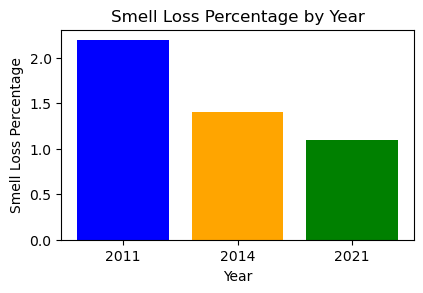

In [2]:
# Create visualizations
plt.figure(figsize=(10, 6))

# Histogram for smell loss percentage
plt.subplot(2, 2, 1)
plt.bar(['2011', '2014', '2021'], [smell_loss_2011, smell_loss_2014, smell_loss_2021], color=['blue', 'orange', 'green'])
plt.title('Smell Loss Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Smell Loss Percentage')

Text(0, 0.5, 'Age')

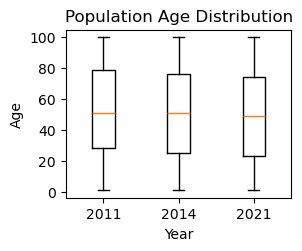

In [3]:
# Box plot for population ages
ages_2011 = [person.age for person in population_2011]
ages_2014 = [person.age for person in population_2014]
ages_2021 = [person.age for person in population_2021]

plt.subplot(2, 2, 2)
plt.boxplot([ages_2011, ages_2014, ages_2021], labels=['2011', '2014', '2021'])
plt.title('Population Age Distribution')
plt.xlabel('Year')
plt.ylabel('Age')

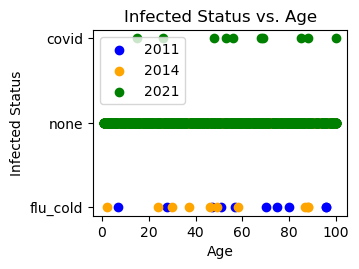

In [4]:
infected_2011 = [person.infected_status for person in population_2011]
infected_2014 = [person.infected_status for person in population_2014]
infected_2021 = [person.infected_status for person in population_2021]

plt.subplot(2, 2, 3)
plt.scatter(ages_2011, infected_2011, color='blue', label='2011')
plt.scatter(ages_2014, infected_2014, color='orange', label='2014')
plt.scatter(ages_2021, infected_2021, color='green', label='2021')
plt.title('Infected Status vs. Age')
plt.xlabel('Age')
plt.ylabel('Infected Status')
plt.legend()

plt.tight_layout()
plt.show()